# Advanced validation assignment
<li>Using breast_cancer.csv, create a random forest model that predicts malignant given the other relevant variables.  <li>Use a single holdout (test/train split).  Use Grid Search to optimize model hyperparameters. 
<li>Measure the model's performance using AUC, Accuracy, Precision, and Recall.
<li>Implement K-Fold Cross Validation, with 10 folds, on your Breast Cancer Model
<li>Report on how the K-Fold CV score compared to your single holdout AUC
<li>Write a short description of your model's performance.   Include AUC, Accuracy, Precision, and Recall in your discussion.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import the Breast_cancer.csv file
data=pd.read_csv("/Users/Arati/Documents/UIS/FALL2016/DataScience/PythonPrograms/CS570-master/breast_cancer.csv")

In [4]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
#Dropping columns that are not required
data=data.drop(['Unnamed: 0', 'id number'], axis=1)

In [6]:
data.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [7]:
#Setting the feature which has to be predicted
y=data.pop("malignant")

In [9]:
#Initialising the training and test data by using train test split function
X_train, X_test, y_train,y_test=train_test_split(data, y, test_size=.2, random_state=42)

In [10]:
#Grid Search

n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [11]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
best_rfc = estimator.best_estimator_

In [19]:
#Calculating the accuracy 
accuracy=accuracy_score(y_test, best_rfc.predict(X_test))
print(accuracy) 

0.964285714286


In [20]:
y_hat=best_rfc.predict(X_test)

In [21]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [24]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))

0.9642857142857143


In [27]:
#Calculating precision and recall 

print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



In [30]:

print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 3 42]]


**Precision: ** 42 / 42 + 2 = .95
**Recall:** 42 / 42 + 3 = .93

In [36]:
#Calculating AUC

In [37]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.995321637427


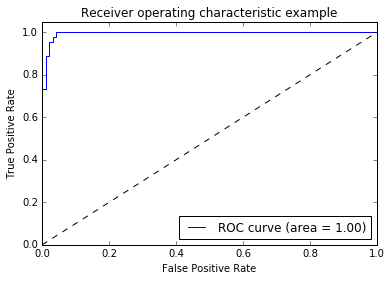

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Train Test Validate

# K- fold cross validation

In [39]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [40]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [41]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Score is 0.970080 +/-  0.018412
95 percent probability that if this experiment were repeated over and over the average score would be between 0.951668 and 0.988492


In [42]:
# Inference 
# When we perform K fold cross validation where k=10, we can infer that 
#accuracy increase when compared to simple train test model.
# Irrespective of the number of folds or data chuncks we provide the accuracy is going to be between 95% to 99%.
# Precision is 95% which means 95% of data is correctly classified as malignant.
# Recall is 93% which means of the 95% of correctly classified data 93% is correct.
